## Assignment 3

1. Apply Data pre-processing (Label Encoding, Data Transformation....) techniques if necessary.
1. Perform data-preparation (Train-Test Split)
1. Apply Machine Learning Algorithm
1. Evaluate Model.

### Importing libraries

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import tree

### Importing dataset

In [2]:
df = pd.read_csv(".//Dataset//admission_data.csv")

In [3]:
df.head()

,Name,GREScore,TOEFLScore,UniversityRating,SOP,LOR,CGPA,Research,Chance of Admit,Unnamed: 9
0,Ethen Koch,337,118,4,4.5,4.5,9.65,1,0.92,0
1,Diana Strong,324,107,4,4.0,4.5,8.87,1,0.76,0
2,Chasity Esparza,316,104,3,3.0,3.5,8.00,1,0.72,0
3,Armando Wallace,322,110,3,3.5,2.5,8.67,1,0.80,0
4,Charles Blackwell,314,103,2,2.0,3.0,8.21,0,0.65,0


### Dropping the last column

In [4]:
df = df.drop(columns='Unnamed: 9', axis=1)
df.head()

,Name,GREScore,TOEFLScore,UniversityRating,SOP,LOR,CGPA,Research,Chance of Admit
0,Ethen Koch,337,118,4,4.5,4.5,9.65,1,0.92
1,Diana Strong,324,107,4,4.0,4.5,8.87,1,0.76
2,Chasity Esparza,316,104,3,3.0,3.5,8.00,1,0.72
3,Armando Wallace,322,110,3,3.5,2.5,8.67,1,0.80
4,Charles Blackwell,314,103,2,2.0,3.0,8.21,0,0.65


### Checking for missing values

In [6]:
df.isnull().sum()

Name                0
GREScore            0
TOEFLScore          0
UniversityRating    0
SOP                 0
LOR                 0
CGPA                0
Research            0
Chance of Admit     0
dtype: int64

### Adding a new column 'Admitted' which has a value 1 if 'Chance of Admit' >= 0.89 and 0 otherwise

In [7]:
df['Admitted'] = [1 if Chance >= 0.89 else 0  for Chance in df['Chance of Admit ']]
df

,Name,GREScore,TOEFLScore,UniversityRating,SOP,LOR,CGPA,Research,Chance of Admit,Admitted
0,Ethen Koch,337,118,4,4.5,4.5,9.65,1,0.92,1
1,Diana Strong,324,107,4,4.0,4.5,8.87,1,0.76,0
2,Chasity Esparza,316,104,3,3.0,3.5,8.00,1,0.72,0
3,Armando Wallace,322,110,3,3.5,2.5,8.67,1,0.80,0
4,Charles Blackwell,314,103,2,2.0,3.0,8.21,0,0.65,0
...,...,...,...,...,...,...,...,...,...,...
495,Reid Coleman,332,108,5,4.5,4.0,9.02,1,0.87,0
496,Immanuel Holden,337,117,5,5.0,5.0,9.87,1,0.96,1
497,Kaiya Randall,330,120,5,4.5,5.0,9.56,1,0.93,1
498,Dominique Landry,312,103,4,4.0,5.0,8.43,0,0.73,0


### Spliting independent and dependent variable

In [9]:
x = df[[ 'GREScore','TOEFLScore','UniversityRating', 'SOP','LOR','CGPA','Research']]
y = df[['Admitted']]

### Spliting the dataset

In [10]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

### Performing training with gini Index and Creating the classifier object

In [11]:
from sklearn.tree import DecisionTreeClassifier

gini_classifier = DecisionTreeClassifier(criterion = "gini", max_depth=5)
gini_classifier.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

### Performing training with entropy and Creating the classifier object

In [12]:
entropy_classifier = DecisionTreeClassifier(criterion = "entropy", max_depth=5)
entropy_classifier.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

### Predicton on testing data with gini Index

In [13]:
gini_test_pred = gini_classifier.predict(x_test)
print("Predicted values:")
print(gini_test_pred)

Predicted values:
[0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 1 1 0 0 0 1 1 1 1 0 0 0 0 0 1 0 0 0
 0 0 1 0 1 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0]


### Prediction on testing data with Entropy

In [14]:
entropy_test_pred = entropy_classifier.predict(x_test)
print("Predicted values:")
print(entropy_test_pred)

Predicted values:
[0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 1 1 0 0 0 1 1 1 1 0 0 0 0 0 1 0 0 0
 0 0 1 0 1 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 1]


### Confusion matrix

In [15]:
from sklearn.metrics import confusion_matrix

print("Confusion Matrix for criterion=gini : ") 
print(confusion_matrix(y_test, gini_test_pred))

print("Confusion Matrix for criterion=entropy : ") 
print(confusion_matrix(y_test, entropy_test_pred))

Confusion Matrix for criterion=gini : 
[[78  0]
 [ 2 20]]
Confusion Matrix for criterion=entropy : 
[[77  1]
 [ 2 20]]


### Accuracy score

In [16]:
from sklearn.metrics import accuracy_score

print('For entropy model')
print ("Accuracy : ", accuracy_score(y_test,entropy_test_pred))
print('For gini model')
print ("Accuracy : ", accuracy_score(y_test,gini_test_pred))

For entropy model
Accuracy :  0.97
For gini model
Accuracy :  0.98


### Classification Report for gini model

In [17]:
from sklearn.metrics import classification_report

print("Report for gini model: \n\n", classification_report(y_test,gini_test_pred))

Report for gini model: 

               precision    recall  f1-score   support

           0       0.97      1.00      0.99        78
           1       1.00      0.91      0.95        22

    accuracy                           0.98       100
   macro avg       0.99      0.95      0.97       100
weighted avg       0.98      0.98      0.98       100



### Classification Report for entropy model

In [18]:
print("Report for entropy model: \n\n", classification_report(y_test,entropy_test_pred))

Report for entropy model: 

               precision    recall  f1-score   support

           0       0.97      0.99      0.98        78
           1       0.95      0.91      0.93        22

    accuracy                           0.97       100
   macro avg       0.96      0.95      0.96       100
weighted avg       0.97      0.97      0.97       100



### Decision Tree of entropy model

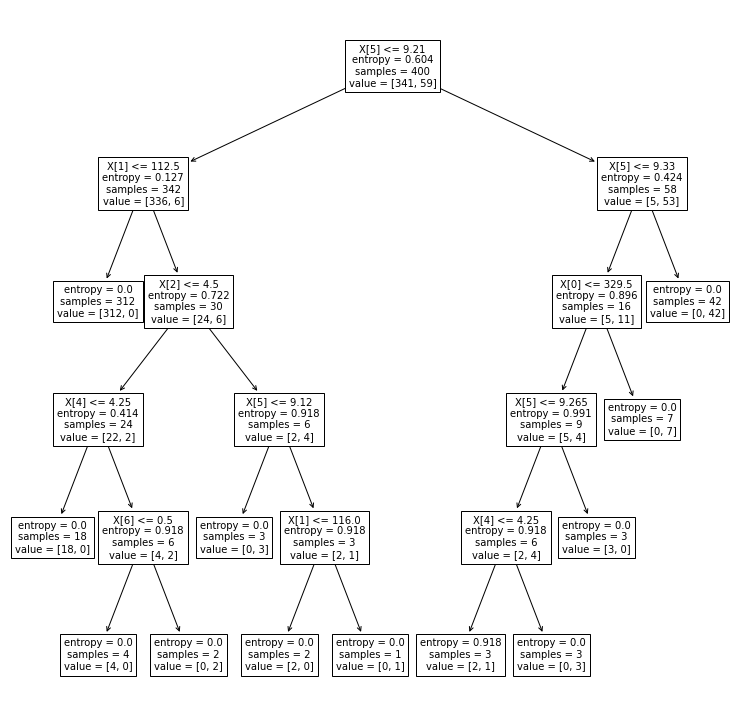

In [19]:
import matplotlib.pyplot as plt

plt.figure(figsize=(13,13))
tree.plot_tree(entropy_classifier, fontsize=10)
plt.show()

### Decision Tree of gini model

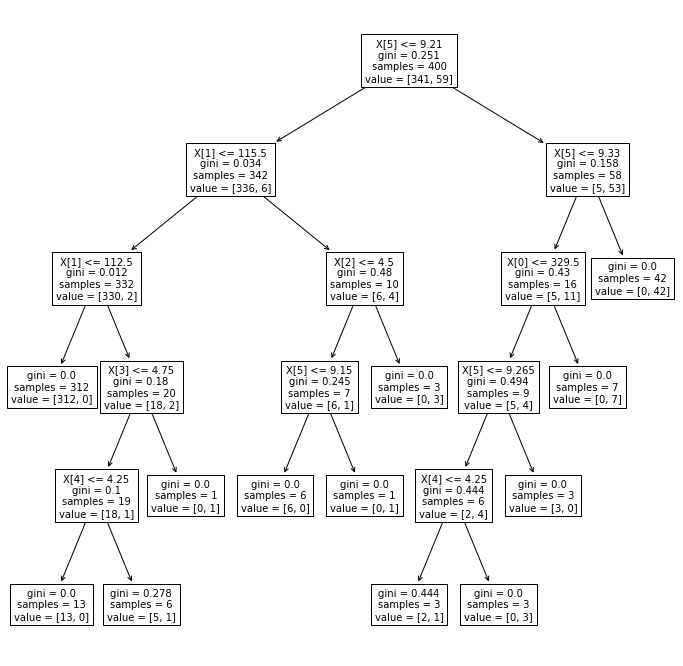

In [20]:
plt.figure(figsize=(12,12))
tree.plot_tree(gini_classifier, fontsize=10)
plt.show()